<a href="https://colab.research.google.com/github/saivenkatreddy29/Pytorch-Learning/blob/main/Pytorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import sklearn as sk


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples = 1000)

In [4]:
data = pd.DataFrame(data = {'variable1' : X[:,0], 'variable2': X[:,1], 'label': y})

In [5]:
data

,variable1,variable2,label
0,-0.492727,-0.870184,0
1,-0.379779,-0.925077,0
2,-0.603401,0.525269,1
3,-0.809017,0.587785,0
4,0.159768,0.783884,1
...,...,...,...
995,-0.590010,-0.540266,1
996,0.766817,-0.228015,1
997,0.503623,-0.863923,0
998,-0.394182,-0.696147,1


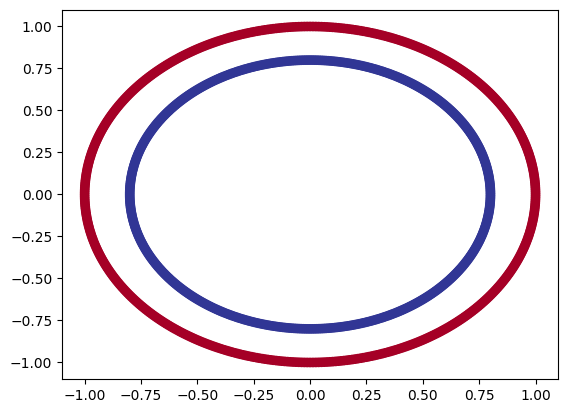

In [6]:
plt.scatter(data['variable1'],data['variable2'],c = y,cmap=plt.cm.RdYlBu)

In [7]:
y_tes = data['label']

In [8]:
import torch
y_tes = y_tes.to_numpy()

In [9]:
y_tes = torch.from_numpy(y_tes)

In [10]:
data = data.drop('label',axis = 1)

In [11]:
X_tes = data.to_numpy()

In [12]:
X_tes = torch.from_numpy(X_tes)

In [13]:
X_tes.shape

torch.Size([1000, 2])

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tes, y_tes)


# **Build a Pytorch Model**

In [47]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [48]:
import torch.nn as nn

In [49]:
class MakeCircles(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2, 8)
    self.layer2 = nn.Linear(8,1)
  def forward(self, x):
    return self.layer2(self.layer1(x))



In [50]:
model0 = MakeCircles().to(device)
model0

MakeCircles(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=1, bias=True)
)

In [51]:
model0 = nn.Sequential(
    nn.Linear(2,8),
    nn.Linear(8,1)
)

In [52]:
model0.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [53]:
X_train = X_train.to(torch.float32)
X_test = X_test.to(torch.float32)

In [54]:
y_train = y_train.to(torch.float32)
y_test = y_test.to(torch.float32)

In [55]:
y_train.dtype

torch.float32

In [56]:
X_train[0]

tensor([-0.7401, -0.3038])

In [57]:
y_train[2]

tensor(0.)

In [62]:
model0.eval()
for i in range (10):
  pred = torch.round(model0(X_test[i]))
  print(f'the prediction is {pred}')

the prediction is tensor([0.], grad_fn=<RoundBackward0>)
the prediction is tensor([0.], grad_fn=<RoundBackward0>)
the prediction is tensor([0.], grad_fn=<RoundBackward0>)
the prediction is tensor([0.], grad_fn=<RoundBackward0>)
the prediction is tensor([-0.], grad_fn=<RoundBackward0>)
the prediction is tensor([-0.], grad_fn=<RoundBackward0>)
the prediction is tensor([0.], grad_fn=<RoundBackward0>)
the prediction is tensor([0.], grad_fn=<RoundBackward0>)
the prediction is tensor([-0.], grad_fn=<RoundBackward0>)
the prediction is tensor([0.], grad_fn=<RoundBackward0>)
